### An example showing the plot_classifier_eval method used by a scikit-learn classifier

In this example, we'll be plotting a `classifier_eval` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_classifier_eval` method.

In [1]:
!conda info -e && python -V

# conda environments:
#
base                     /opt/conda
py311                 *  /opt/conda/envs/py311

Python 3.11.12


In [2]:
from sklearn.datasets import load_iris as data_3_classes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.5.0.dev0+git.20250430.079ba10'

In [3]:
sp.metrics.plot_classifier_eval?

Signature:
sp.metrics.plot_classifier_eval(
    y_true,
    y_pred,
    *,
    labels=None,
    normalize=None,
    digits=3,
    title='train',
    title_fontsize='large',
    text_fontsize='medium',
    cmap=None,
    x_tick_rotation=0,
    figsize=(8, 3),
    nrows=1,
    ncols=2,
    index=2,
    **kwargs,
)
Docstring:
Generates various evaluation plots for a classifier, including confusion matrix,
precision-recall curve, and ROC curve.

This function provides a comprehensive view of a classifier's performance through
multiple plots, helping in the assessment of its effectiveness
and areas for improvement.

Parameters
----------
y_true : array-like, shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like, shape (n_samples,)
    Predicted target values from the classifier.

labels : list of string, optional
    List of labels for the classes.
    If None, labels are automatically generated based on the class indices.

normalize : {'true', 'pred', 'all', Non

In [4]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

# Create an instance of the LogisticRegression
model = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train)

# Perform predictions
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

## default settings (as two image)

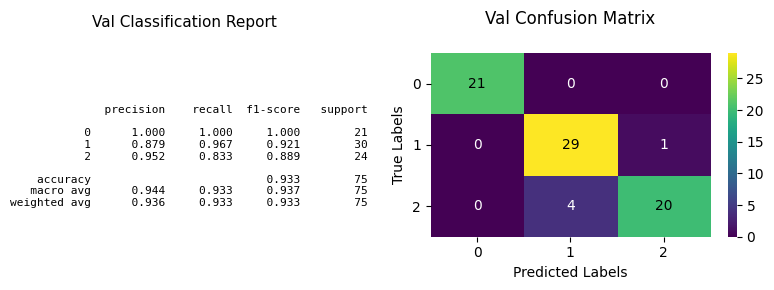

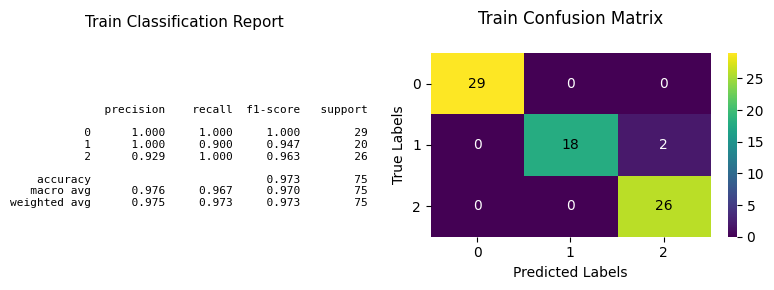

In [5]:
fig1 = sp.metrics.plot_classifier_eval(
	y_val, y_val_pred, labels=np.unique(y),
    title='Val'
)
fig2 = sp.metrics.plot_classifier_eval(
    y_train, y_train_pred, labels=np.unique(y));

## use only custom figure (as two image)

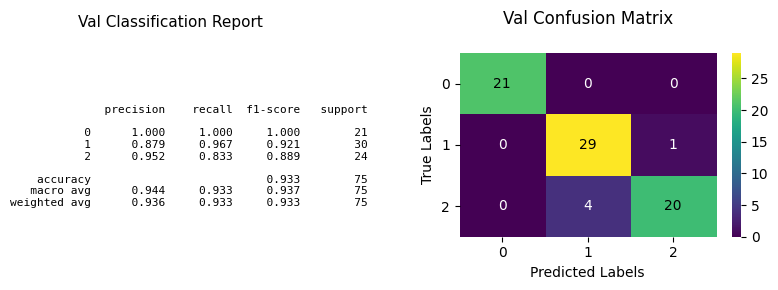

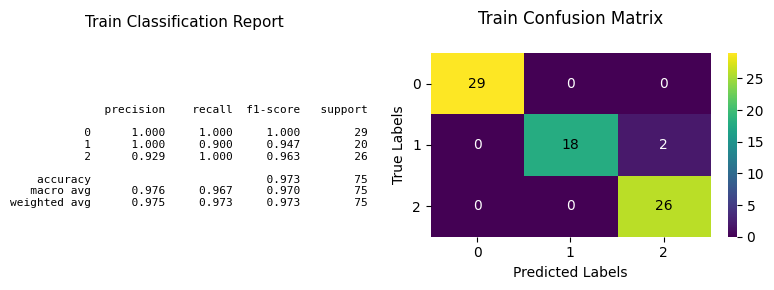

(<Figure size 800x300 with 3 Axes>, <Figure size 800x300 with 3 Axes>)

In [8]:
fig3 = plt.figure(figsize=(8, 3))
fig4 = plt.figure(figsize=(8, 3))

fig3 = sp.metrics.plot_classifier_eval(
	y_val, y_val_pred, labels=np.unique(y),
    title='Val',
    fig=fig3,
    show_fig=False,
)
fig4 = sp.metrics.plot_classifier_eval(
	y_train, y_train_pred, labels=np.unique(y),
    fig=fig4,
    # show_fig=False,
)
fig3, fig4

## use only custom axes (as one image)

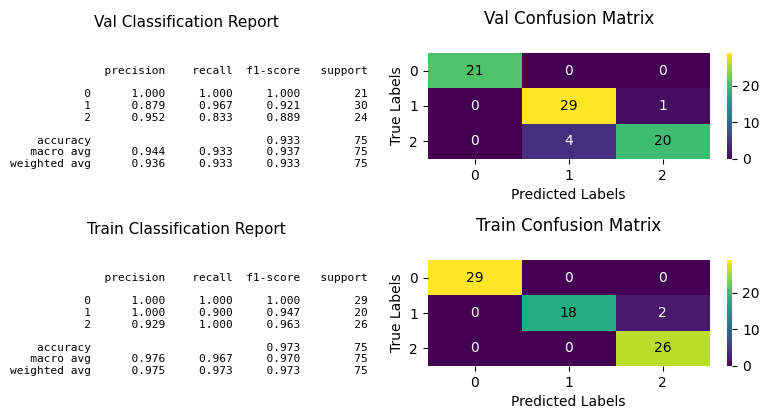

In [9]:
fig = plt.figure(figsize=(8, 8))
ax1 = [fig.add_subplot(4, 2, 1), fig.add_subplot(4, 2, 2)]
ax2 = [fig.add_subplot(4, 2, 3), fig.add_subplot(4, 2, 4)]

figs = sp.metrics.plot_classifier_eval(
	y_val, y_val_pred, labels=np.unique(y),
    title='Val',
    fig=fig, ax=ax1,
    show_fig=False,
)
figs = sp.metrics.plot_classifier_eval(
	y_train, y_train_pred, labels=np.unique(y),
    fig=fig, ax=ax2,
    # show_fig=False,
)

## combine figs to one fig (as one image)

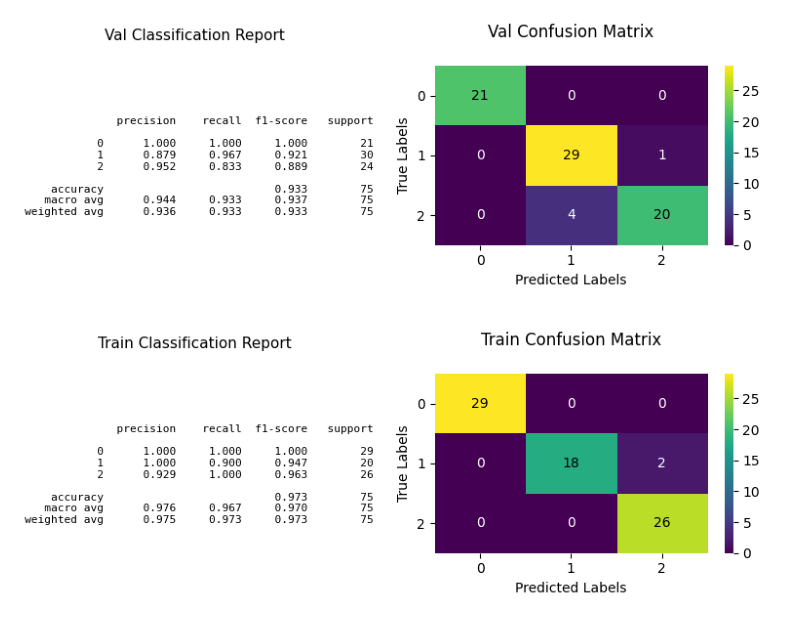

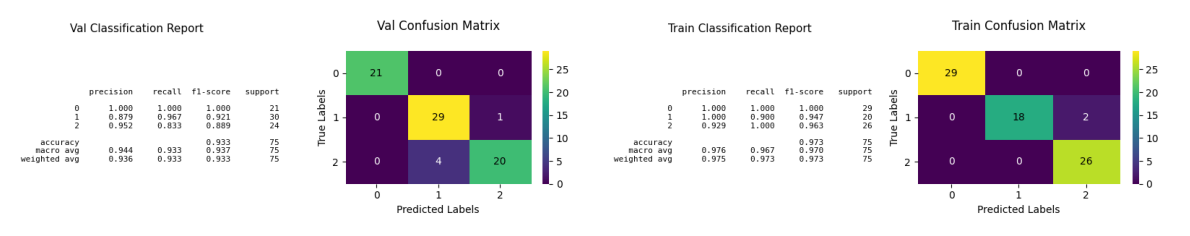

In [16]:
# Save the combined figure as an image file
figs = sp.stack_mpl_figures(
    fig1, fig2,
)
figs = sp.stack_mpl_figures(
    fig3, fig4,
    figsize=(12,5),
    orient='x',
)